In [1]:
%matplotlib inline
import d2lzh as d2l
import mxnet as mx
from mxnet import autograd, gluon, image, init, nd
from mxnet.gluon import data as gdata, loss as gloss, utils as gutils
import sys
import time

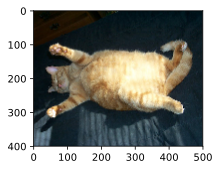

In [2]:
d2l.set_figsize()
img = image.imread('C:\\Users\\kenya\\Desktop\\d2l-zh\\img\\cat1.jpg')
d2l.plt.imshow(img.asnumpy())

In [3]:
# 定义绘图函数
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j].asnumpy())
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [4]:
# apply函数对输入图像img多次运行图像增广方法aug并展示所有的结果
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

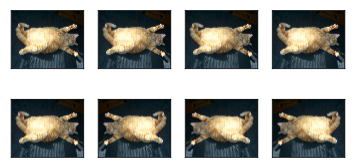

In [5]:
# 左右翻转
apply(img, gdata.vision.transforms.RandomFlipLeftRight())

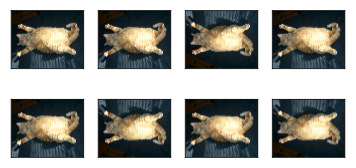

In [6]:
# 上下翻转
apply(img, gdata.vision.transforms.RandomFlipTopBottom())

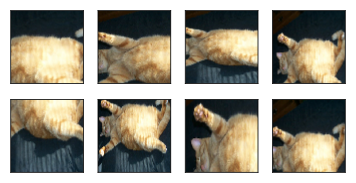

In [7]:
# 通过对图像随机裁剪来让物体以不同的比例出现在图像的不同位置，
# 这同样能够像池化层一样降低模型对目标位置的敏感性
shape_aug = gdata.vision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)
# 上面代码每次裁剪出一块面积为原面积10%~100%的区域，
# 且该区域的宽、高比随机取自0.5~2，然后再将该区域的宽和高分别缩放到200像素

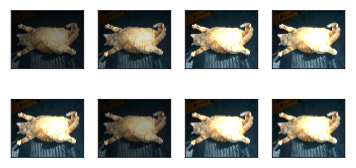

In [8]:
# 变化颜色
# 将图像的亮度随机变化为原图亮度的50%（1−0.5）∼150%（1+0.5）
apply(img, gdata.vision.transforms.RandomBrightness(0.5))

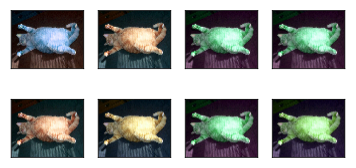

In [9]:
# 随机变化图像的色调
apply(img, gdata.vision.transforms.RandomHue(0.5))

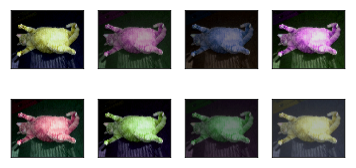

In [10]:
# 通过创建RandomColorJitter实例并同时设置如何随机变化图像的
# 亮度（brightness）、对比度（contrast）、饱和度（saturation）和色调（hue）

color_aug = gdata.vision.transforms.RandomColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

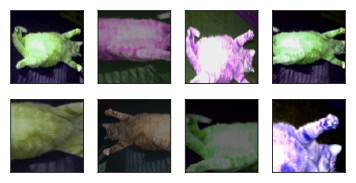

In [11]:
# 叠加多个图像增广的方法
# 通过Compose实例将多个图像增广的方法叠加起来
augs = gdata.vision.transforms.Compose([
    gdata.vision.transforms.RandomFlipLeftRight(), color_aug, shape_aug])
apply(img, augs)

In [ ]:
# 展示CIFAR-10数据集中前32张训练图像
show_images(gdata.vision.CIFAR10(train=True)[0:32][0], 4, 8, scale=0.8);